In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_now(ax1, vdsh_prec, edge_prec, node2hash_prec, title_str, min_ylim, max_ylim):
    N = 5
    ind = np.arange(N)
    width = 0.20       

    ax1.bar(ind, vdsh_prec, width, align='edge', label='Text-Only')
    ax1.bar(ind + width, edge_prec, width, align='edge', label='Connection-Only')
    ax1.bar(ind + width + width, node2hash_prec, width, align='edge', label='Both')

    ax1.set_ylim(min_ylim, max_ylim)

    ax1.set_ylabel('Prec@100')
    ax1.title.set_text(title_str)

    ax1.set_xlabel('Number of bits')
    ax1.set_xticks(ind)
    ax1.set_xticklabels(['8', '16', '32', '64', '128'])


In [3]:
def load_df(dataset_name):
    vdsh_df = pd.read_csv('vdsh_logs/vdsh.experiment.{}.txt'.format(dataset_name), sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])
    edgeonly_df = pd.read_csv('edgeonly_logs/binary.Experiment.{}.txt'.format(dataset_name), sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])
    node2hash_df = pd.read_csv('binary_logs/binary.Experiment.{}.txt'.format(dataset_name), sep='\t', header=None, 
                                 names=['dataset', 'bits', 'samples', 'Prec'])
    return vdsh_df, edgeonly_df, node2hash_df

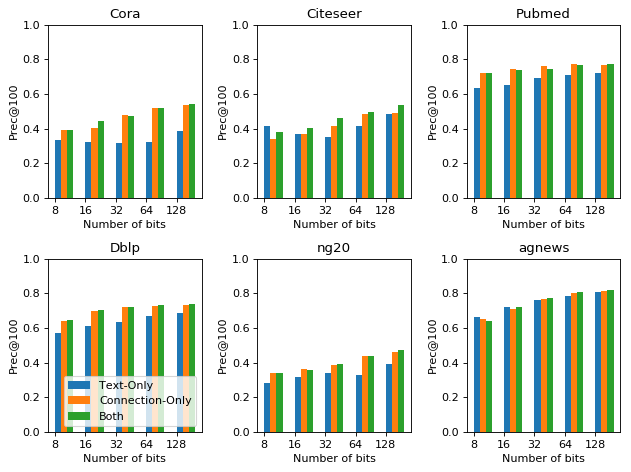

In [6]:
fig = plt.figure(figsize=(8, 6), dpi=80)

# Cora
vdsh_df, edgeonly_df, node2hash_df = load_df('cora')

ax1 = plt.subplot(231)
plot_now(ax1, list(vdsh_df.Prec), list(edgeonly_df.Prec), list(node2hash_df.Prec), "Cora", 0.0, 1.0)

# Cora
vdsh_df, edgeonly_df, node2hash_df = load_df('citeseer')

ax1 = plt.subplot(232)
plot_now(ax1, list(vdsh_df.Prec), list(edgeonly_df.Prec), list(node2hash_df.Prec), "Citeseer", 0.0, 1.0)

# Pubmed
vdsh_df, edgeonly_df, node2hash_df = load_df('pubmed')

ax1 = plt.subplot(233)
plot_now(ax1, list(vdsh_df.Prec), list(edgeonly_df.Prec), list(node2hash_df.Prec), "Pubmed", 0.0, 1.0)

# Dblp
vdsh_df, edgeonly_df, node2hash_df = load_df('dblp')

ax1 = plt.subplot(234)
plot_now(ax1, list(vdsh_df.Prec), list(edgeonly_df.Prec), list(node2hash_df.Prec), "Dblp", 0.0, 1.0)
ax1.legend(loc='lower right')

# ng20
vdsh_df, edgeonly_df, node2hash_df = load_df('ng20')

ax1 = plt.subplot(235)
plot_now(ax1, list(vdsh_df.Prec), list(edgeonly_df.Prec), list(node2hash_df.Prec), "ng20", 0.0, 1.0)

# agnews
vdsh_df, edgeonly_df, node2hash_df = load_df('agnews')

ax1 = plt.subplot(236)
plot_now(ax1, list(vdsh_df.Prec), list(edgeonly_df.Prec), list(node2hash_df.Prec), "agnews", 0.0, 1.0)

plt.tight_layout()

In [7]:
fig.savefig("component_experiment.pdf", bbox_inches='tight')